In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read files from buckets
dataset = tf.data.TFRecordDataset([
    "gs://bathy_sample/processed/20211009/large_images/100_102large_images.tfrecords"
])


In [3]:
# take 10 examples for testing
examples = dataset.take(10)
examples

<TakeDataset shapes: (), types: tf.string>

In [4]:
def tf_parse(eg):
    """parse an example (or batch of examples, not quite sure...)"""
    
    # here we re-specify our format
    # you can also infer the format from the data using tf.train.Example.FromString
    # but that did not work
    example = tf.io.parse_example(
        eg[tf.newaxis],
        {
            "width": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
            "height": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
            "label": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            "raw_image": tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            "depth": tf.io.FixedLenFeature(shape=(), dtype=tf.int64),
        },
    )
    raw_image = tf.io.parse_tensor(example["raw_image"][0], out_type="float32")
    label = tf.io.parse_tensor(example["label"][0], out_type="float32")
    return raw_image, label

In [5]:
# test on the whole dataset
raw_image, label = next(iter(dataset.map(tf_parse)))

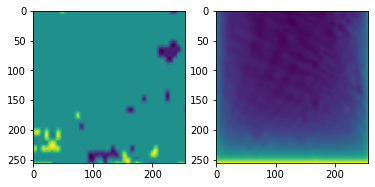

In [6]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(raw_image)
axes[1].imshow(label)